### TensorFlow 설치

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'1.14.0'

### Hypothesis

$$ H(x) = Wx + b $$
$$ H(x1, x2, x3) = w1 x1 + w2 x2 + w3 x3 + b $$

### Cost function

$$ H(x1, x2, x3) = w1 x1 + w2 x2 + w3 x3 + b $$
$$ cost(W,b) = \frac{1}{m} \sum^m_{i=1}(H(x1^{(i)}, x2^{(i)}, x3^{(i)} )-y^{(i)})^2$$


### EX1. x, y 값이 주어졌을 때, W, b 값을 예측하기

#### 1. 그래프 빌드
#### 2. 세션을 통해 그래프를 실행
#### 3. 실행결과가 그래프를 업데이트

In [5]:
from tqdm import tqdm_notebook
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y  = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b  = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b
print(hypothesis)

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

Tensor("add_5:0", dtype=float32)


In [6]:
from tqdm import tqdm_notebook

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))


Step : 0 
Cost : 36010.02734375 
Prediction :
[-16.280907 -17.989803 -18.515007 -22.175758 -11.355569]

Step : 1 
Cost : 11287.6767578125 
Prediction :
[57.82734  71.08274  69.24972  73.39786  56.584312]

Step : 2 
Cost : 3538.53369140625 
Prediction :
[ 99.31784  120.951164 118.385956 126.90603   94.62132 ]

Step : 3 
Cost : 1109.588134765625 
Prediction :
[122.54687 148.87067 145.89555 156.86331 115.91684]

Step : 4 
Cost : 348.2430419921875 
Prediction :
[135.55196 164.50177 161.29715 173.6353  127.83938]

Step : 5 
Cost : 109.6019515991211 
Prediction :
[142.83302 173.25302 169.91994 183.02533 134.51434]

Step : 6 
Cost : 34.80030059814453 
Prediction :
[146.90945 178.15253 174.74754 188.2825  138.25142]

Step : 7 
Cost : 11.354058265686035 
Prediction :
[149.1917  180.89558 177.45032 191.2258  140.34361]

Step : 8 
Cost : 4.00492525100708 
Prediction :
[150.46944 182.43129 178.9635  192.87364 141.51494]

Step : 9 
Cost : 1.7012488842010498 
Prediction :
[151.18483 183.2911  179.8

### EX2. Plaeholder 사용
#### 데이터의 형태만 지정하고 실제 데이터는 실행단계에서 입력받는 방법

#### 1.그래프 빌드
#### 2.세션을 통해 그래프를 실행
#### 3.실행결과가 그래프를 업데이트

In [7]:
import tensorflow as tf

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())

In [8]:
steps     = []
cost_vals = []
W_vals    = []
b_vals    = []
for step in tqdm_notebook(range(2001)):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                                         feed_dict={X: [1, 2, 3], 
                                                    Y: [1, 2, 3]})
    steps.append(step)
    cost_vals.append(cost_val)
    W_vals.append(W_val)
    b_vals.append(b_val)
    # W_vals.append(float(W_val))
    # b_vals.append(float(b_val))
    
    if step % 200 == 0 or step < 5:
        print("step={step}, \t cost={cost_val}, \t W={W_val}, \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));

step=0, 	 cost=39.70097732543945, 	 W=[-0.80500764], 	 b=[-1.7964888]
step=1, 	 cost=31.40232276916504, 	 W=[-0.5646807], 	 b=[-1.6883587]
step=2, 	 cost=24.842575073242188, 	 W=[-0.3511095], 	 b=[-1.5920043]
step=3, 	 cost=19.657350540161133, 	 W=[-0.16132578], 	 b=[-1.5061198]
step=4, 	 cost=15.558608055114746, 	 W=[0.00730941], 	 b=[-1.4295444]
step=200, 	 cost=0.038831520825624466, 	 W=[1.2283194], 	 b=[-0.5190236]
step=400, 	 cost=0.014827747829258442, 	 W=[1.1410873], 	 b=[-0.32072487]
step=600, 	 cost=0.005661958362907171, 	 W=[1.0871834], 	 b=[-0.19818835]
step=800, 	 cost=0.0021620059851557016, 	 W=[1.0538739], 	 b=[-0.12246828]
step=1000, 	 cost=0.0008255562861450016, 	 W=[1.0332907], 	 b=[-0.07567774]
step=1200, 	 cost=0.00031524189398624003, 	 W=[1.0205718], 	 b=[-0.04676443]
step=1400, 	 cost=0.00012037125270580873, 	 W=[1.0127119], 	 b=[-0.02889728]
step=1600, 	 cost=4.596456346916966e-05, 	 W=[1.0078552], 	 b=[-0.01785678]
step=1800, 	 cost=1.7552025383338332e-05, 	 W=[1

## Ex3. Linear Regression

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


## x,y 값 설정
number_of_points = 200
x_point = []
y_point = []

w = 0.25
b = 0.75

for i in range(number_of_points):
    x = np.random.normal(0.0, 0.5)
    y = w*x + b +np.random.normal(0.0, 0.1)
    x_point.append([x])
    y_point.append([y])

In [10]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
B = tf.Variable(tf.zeros([1]))
y = W * x_point + B # Hypothesis

# Computes the mean of elements across dimensions of a tensor
cost_function = tf.reduce_mean(tf.square(y - y_point))

# Optimizer that implements the gradient descent algorithm
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

# Add operations to minimize cost_function
train = optimizer.minimize(cost_function)

# Returns an Op that initializes global variables
# model = tf.initialize_all_variables()
model = tf.global_variables_initializer()


 y = [0.52068263] x + [0.73392] 


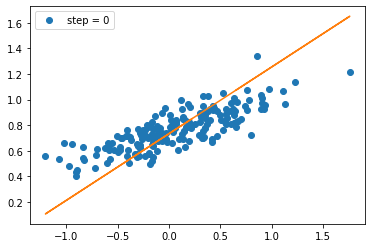


 y = [0.4565214] x + [0.73557264] 


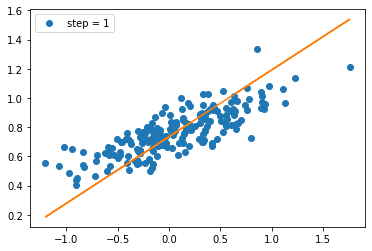


 y = [0.40784615] x + [0.73929757] 


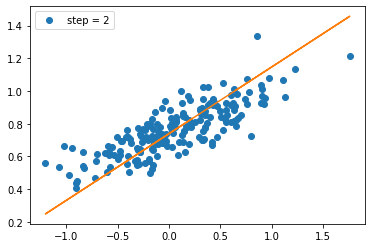


 y = [0.37077573] x + [0.7421234] 


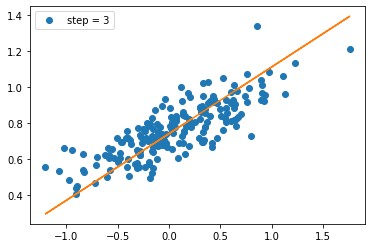


 y = [0.34254402] x + [0.74427557] 


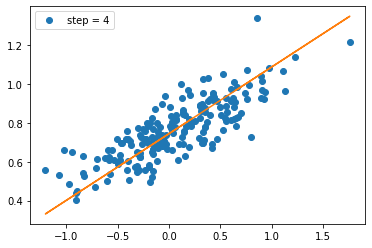


 y = [0.25236934] x + [0.7511497] 


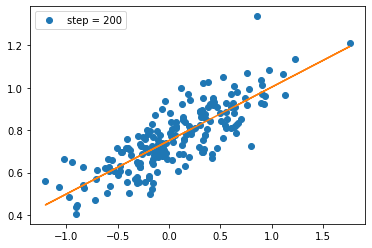


 y = [0.25236934] x + [0.7511497] 


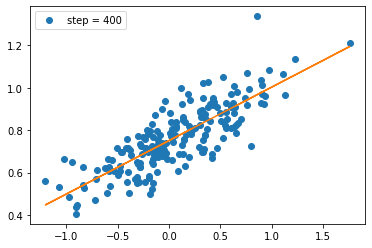


 y = [0.25236934] x + [0.7511497] 


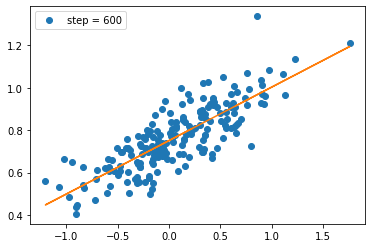


 y = [0.25236934] x + [0.7511497] 


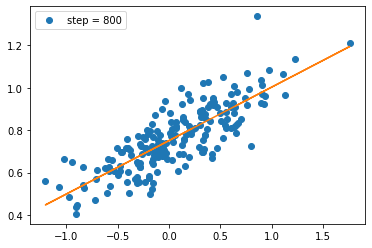


 y = [0.25236934] x + [0.7511497] 


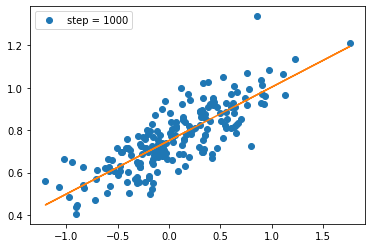


 y = [0.25236934] x + [0.7511497] 


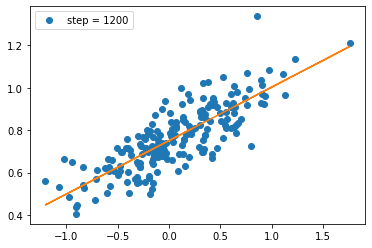


 y = [0.25236934] x + [0.7511497] 


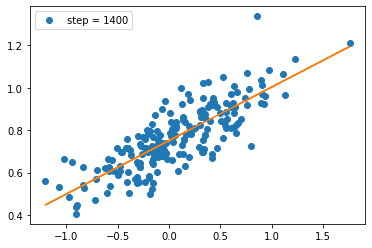


 y = [0.25236934] x + [0.7511497] 


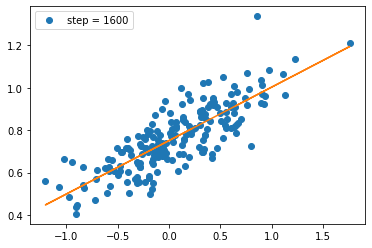


 y = [0.25236934] x + [0.7511497] 


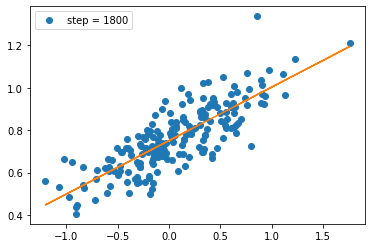


 y = [0.25236934] x + [0.7511497] 


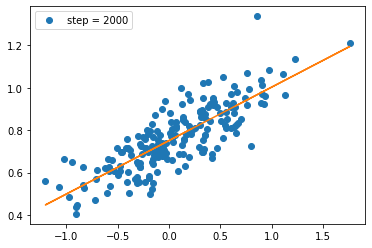

In [11]:
with tf.Session() as sess:
    sess.run(model)
    for step in range(0,2001):
        sess.run(train)
        if (step % 200) == 0 or step<5:
            print("\n y = {w} x + {b} ".format(w=sess.run(W), b=sess.run(B)))
            plt.plot(x_point,y_point,'o',label='step = {}'.format(step))
            plt.plot(x_point,sess.run(W)*x_point+sess.run(B))
            plt.legend(loc=2)
            plt.show()

# Cost minimize

## 1. Our hypothesis for linear model X * W
### hypothesis = X * W


$$H(x) = Wx$$




## 2. cost/loss function
### cost = tf.reducemean(tf.square(hypothesis - Y))


$$cost(W) = \frac{1}{m} \sum^m{i=1}(H(x^{(i)}-y^{(i)})^2)$$


## 3. Gradient descent


$$cost(W) = \frac{1}{m} \sum^m_{i=1}(H(x^{(i)}-y^{(i)})^2$$

$$W := W - a\frac{1}{m} \sum^m_{i=1}(Wx^{(i)}-y^{(i)})x^{(i)}$$



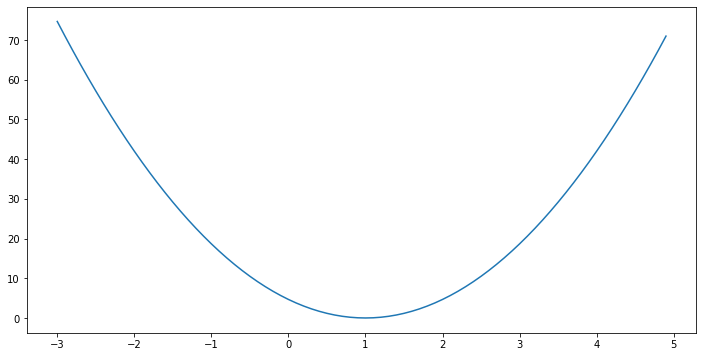

In [12]:
## Cost/ loss func.

import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,6]

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

In [16]:
## Gradient descent
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

In [17]:
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

W_val = []
step_val = []

for step in range(101):
    W_val.append(sess.run(W))
    step_val.append(step)
    
    if step % 10 == 0 or step < 10:
        # print(step, sess.run(W))
        print("step={step}, \t W={W_val}".format(
            step=step, W_val=sess.run(W)
            )); 
                
    sess.run(train)

step=0, 	 W=5.0
step=1, 	 W=1.2666664123535156
step=2, 	 W=1.0177778005599976
step=3, 	 W=1.0011851787567139
step=4, 	 W=1.0000790357589722
step=5, 	 W=1.0000052452087402
step=6, 	 W=1.0000003576278687
step=7, 	 W=1.0
step=8, 	 W=1.0
step=9, 	 W=1.0
step=10, 	 W=1.0
step=20, 	 W=1.0
step=30, 	 W=1.0
step=40, 	 W=1.0
step=50, 	 W=1.0
step=60, 	 W=1.0
step=70, 	 W=1.0
step=80, 	 W=1.0
step=90, 	 W=1.0
step=100, 	 W=1.0


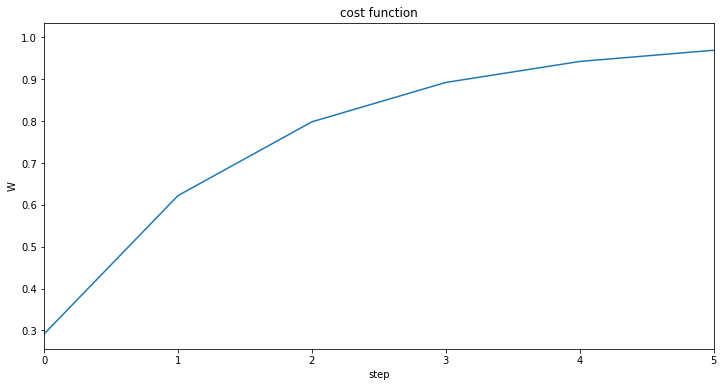

In [21]:
# Show the cost function
plt.plot(step_val, W_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('W')
plt.xlim(0, 5)
plt.show()

## Ex. Multi-variable matmul linear regression

### Hypothesis using matrix
$$ w1 x1 + w2 x2 + w3 x3 + ... + wn xn $$

$$ [x{1} x{2} x{3}] \times \begin{bmatrix} w{1}\ w{2}\ w{3} $$

### \end{bmatrix}
$$ [x_1 w_1 + x_2 w_2 + x_3 w_3] $$

$$H(X) = XW$$

### TIP. 행렬식 생각

In [22]:
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

x_data = [[73., 80., 75.], 
          [93., 88., 93.],
          [89., 91., 90.], 
          [96., 98., 100.], 
          [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]
#x_data는 하나의 리스트당 3개의 데이터
#y_data는 하나의 리스트당 하나의 데이터



# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3]) #x_data는 하나의 리스트당 3개의 데이터
Y = tf.placeholder(tf.float32, shape=[None, 1]) #y_data는 하나의 리스트당 하나의 데이터

W = tf.Variable(tf.random_normal([3, 1]), name='weight') #3by1 matrix
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [23]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))


Step : 0 
Cost : 970.3675537109375 
Prediction :
[[131.93364 ]
 [146.66693 ]
 [150.79033 ]
 [164.23979 ]
 [108.565895]]

Step : 1 
Cost : 328.1596984863281 
Prediction :
[[143.87549]
 [161.02438]
 [164.93475]
 [179.64293]
 [119.51789]]

Step : 2 
Cost : 126.84867095947266 
Prediction :
[[150.56029]
 [169.06328]
 [172.85341]
 [188.26634]
 [125.65044]]

Step : 3 
Cost : 63.735496520996094 
Prediction :
[[154.3019 ]
 [173.56467]
 [177.28647]
 [193.09406]
 [129.08473]]

Step : 4 
Cost : 43.94036102294922 
Prediction :
[[156.39568]
 [176.08546]
 [179.76807]
 [195.79668]
 [131.00838]]

Step : 5 
Cost : 37.722869873046875 
Prediction :
[[157.56691]
 [177.49748]
 [181.15714]
 [197.30952]
 [132.08626]]

Step : 6 
Cost : 35.761375427246094 
Prediction :
[[158.22168]
 [178.2887 ]
 [181.93451]
 [198.15628]
 [132.69064]]

Step : 7 
Cost : 35.13386917114258 
Prediction :
[[158.58725]
 [178.73235]
 [182.36943]
 [198.63011]
 [133.02992]]

Step : 8 
Cost : 34.92456817626953 
Prediction :
[[158.79094]


## Ex. File input linear regression

In [18]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('./data/data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print("x_data.shape : {}, \tlen(x_data) : {} \nx_data : \n{}".format(x_data.shape, len(x_data), x_data))
print("-"*25)
print("y_data.shape : {}  \ny_data : \n{}".format(y_data.shape, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

x_data.shape : (25, 3), 	len(x_data) : 25 
x_data : 
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
-------------------------
y_data.shape : (25, 1)  
y_data : 
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [19]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))


Step : 0 
Cost : 47829.4609375 
Prediction :
[[-66.17106 ]
 [-51.897587]
 [-65.661255]
 [-68.70268 ]
 [-34.906334]
 [-17.936304]
 [-54.824265]
 [-46.26666 ]
 [-38.53811 ]
 [-26.858534]
 [-47.460365]
 [-33.449764]
 [-70.2755  ]
 [-60.52128 ]
 [-50.618046]
 [-52.518322]
 [-52.461407]
 [-70.53982 ]
 [-71.69783 ]
 [-66.57909 ]
 [-61.42079 ]
 [-47.64652 ]
 [-61.698124]
 [-72.529816]
 [-59.497818]]

Step : 1 
Cost : 17762.474609375 
Prediction :
[[14.325285]
 [44.842545]
 [29.663145]
 [35.111603]
 [38.872536]
 [36.454933]
 [22.885138]
 [11.343676]
 [51.868866]
 [56.876877]
 [27.407148]
 [40.366737]
 [28.208838]
 [21.349142]
 [27.447058]
 [45.649857]
 [25.508062]
 [22.72038 ]
 [22.194487]
 [17.432928]
 [29.704916]
 [43.108124]
 [25.18418 ]
 [ 8.632261]
 [40.764122]]

Step : 2 
Cost : 6645.82080078125 
Prediction :
[[ 63.27323 ]
 [103.66438 ]
 [ 87.626015]
 [ 98.23642 ]
 [ 83.73246 ]
 [ 69.52548 ]
 [ 70.13708 ]
 [ 46.374817]
 [106.838524]
 [107.788765]
 [ 72.93045 ]
 [ 85.24921 ]
 [ 88.09355 

 [194.97615]]

Step : 1200 
Cost : 58.65964889526367 
Prediction :
[[143.96664 ]
 [191.74925 ]
 [179.08443 ]
 [196.86794 ]
 [149.50221 ]
 [115.473045]
 [145.01721 ]
 [103.61887 ]
 [185.90623 ]
 [178.0775  ]
 [143.41928 ]
 [150.45186 ]
 [183.4173  ]
 [151.16026 ]
 [148.7018  ]
 [194.6217  ]
 [147.55174 ]
 [170.74211 ]
 [171.69041 ]
 [151.98409 ]
 [171.99174 ]
 [180.54765 ]
 [161.87595 ]
 [141.343   ]
 [194.87053 ]]

Step : 1300 
Cost : 55.3299674987793 
Prediction :
[[144.27507]
 [191.53636]
 [179.17995]
 [196.91676]
 [149.24031]
 [115.12663]
 [145.13553]
 [103.83815]
 [185.50449]
 [177.53125]
 [143.41592]
 [150.16988]
 [183.56181]
 [151.31956]
 [148.72737]
 [194.40712]
 [147.58917]
 [170.98463]
 [171.9268 ]
 [152.2488 ]
 [172.06635]
 [180.33159]
 [162.01222]
 [141.76445]
 [194.76726]]

Step : 1400 
Cost : 52.228336334228516 
Prediction :
[[144.57219 ]
 [191.33026 ]
 [179.27138 ]
 [196.9643  ]
 [148.98605 ]
 [114.79309 ]
 [145.25183 ]
 [104.053856]
 [185.11766 ]
 [177.0076  ]
 [143.4134

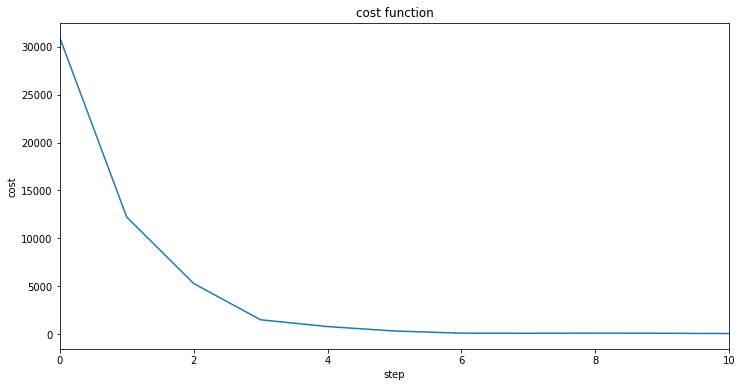

In [20]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,6]

# Show the cost function
plt.plot(Step_val, Cost_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('cost')
plt.xlim(0,10)
plt.show()

In [12]:
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

filename_queue = tf.train.string_input_producer(
    ['./data/data-01-test-score.csv'], shuffle=False, name='filename_queue')
#shuffle=False을 해줌으로써 수들이 섞이지 않게


reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

# Default values, in case of empty columns. Also specifies the type of the decoded result.
# Convert CSV records to tensors. Each column maps to one tensor.
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

# collect batches of csv in
train_x_batch, train_y_batch = \
    tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

W0911 11:03:52.211034  9272 deprecation.py:323] From <ipython-input-12-4a1d47d98880>:6: string_input_producer (from tensorflow.python.training.input) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
W0911 11:03:52.222724  9272 deprecation.py:323] From C:\Users\202-006\Anaconda3\lib\site-packages\tensorflow\python\training\input.py:278: input_producer (from tensorflow.python.training.input) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
W0911 11:03:52.2246

In [13]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Start populating the filename queue.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

Step_val = []
Cost_val = []

for step in tqdm_notebook(range(2001)):

    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_batch, Y: y_batch})
    

    Step_val.append(step)
    Cost_val.append(cost_val)
    
    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))

coord.request_stop()
coord.join(threads)

W0911 11:04:44.198271  9272 deprecation.py:323] From <ipython-input-13-a0a2b752713a>:8: start_queue_runners (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.



Step : 0 
Cost : 30978.400390625 
Prediction :
[[-10.5520935]
 [-18.421577 ]
 [-14.914436 ]
 [-19.039238 ]
 [-13.2786255]
 [-14.993626 ]
 [-16.968872 ]
 [-16.157917 ]
 [-22.078262 ]
 [-27.293266 ]]

Step : 1 
Cost : 12231.3759765625 
Prediction :
[[43.16722 ]
 [38.92281 ]
 [64.13846 ]
 [56.88572 ]
 [42.62716 ]
 [55.684196]
 [55.79019 ]
 [51.981804]
 [62.46227 ]
 [55.94705 ]]

Step : 2 
Cost : 5287.12353515625 
Prediction :
[[ 97.59089 ]
 [ 97.0528  ]
 [ 94.32073 ]
 [100.271095]
 [112.16209 ]
 [ 92.96686 ]
 [106.03886 ]
 [107.69688 ]
 [114.504074]
 [ 81.644264]]

Step : 3 
Cost : 1493.1212158203125 
Prediction :
[[ 74.055824]
 [110.207405]
 [ 78.125465]
 [125.918816]
 [109.81078 ]
 [107.33985 ]
 [102.183716]
 [148.57176 ]
 [127.08399 ]
 [109.53553 ]]

Step : 4 
Cost : 783.9133911132812 
Prediction :
[[155.31958]
 [134.9293 ]
 [146.63405]
 [157.76044]
 [141.21684]
 [143.87987]
 [143.15866]
 [138.45131]
 [141.47476]
 [163.08902]]

Step : 5 
Cost : 321.26654052734375 
Prediction :
[[144.1

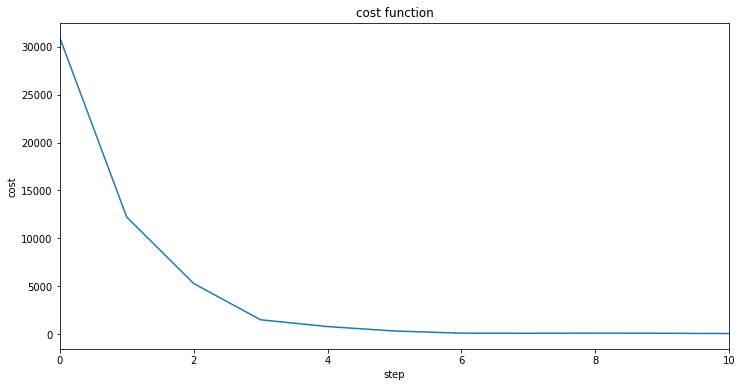

In [14]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,6]

# Show the cost function
plt.plot(Step_val, Cost_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('cost')
plt.xlim(0,10)
plt.show()

### 학습을시킨후
## prediction

In [16]:
# Ask score
print("Your score \t: \n", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

Your score 	: 
 [[180.75392]]


In [17]:
# Ask score many
print("\nOther scores \t: \n", sess.run(hypothesis,
                                        feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))



Other scores 	: 
 [[155.70262]
 [185.67659]]
